In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.metrics import f1_score, accuracy_score
import seaborn as seab
#from sklearn import preprocessing
#from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
#from interpret.blackbox import LimeTabular
#from interpret import show

In [9]:
data = pd.read_excel('eines.xlsx')
data.head(10)

,HISTORY_ID,MODEL,SERIAL_NUMBER,GLOBAL_SERIAL_NUMBER,COLOR,DATE_TIME,ENABLED,STATUS,RESULT,ACTION,WERS_CODE,COLOR_CODE,SUFFIX_MASK,TUNNEL,FINISHED,FINISH_LINE,CHECKSUM,CYCLE,REPAIRED,Instance
0,1015924,2,3120222037000,NaN,37,2022-05-20 10:20:22.000,1,2,0,0.0,NaN,5X,NaN,2,1,1,NaN,2,0,"MB M17, DL3"
1,1015925,2,3120222156702,NaN,3,2022-05-20 10:21:43.000,1,2,1,NaN,NaN,9P,NaN,3,1,1,135545776.0,1,0,"MB M17, DL3"
2,1015926,9,3120221918916,NaN,36,2022-05-20 10:21:38.000,1,2,1,0.0,NaN,5X,NaN,1,1,1,NaN,1,1,"MB M17, DL3"
3,1015927,1,3120222157311,NaN,29,2022-05-20 10:21:46.000,1,2,0,0.0,NaN,0F,NaN,2,1,1,NaN,2,1,"MB M17, DL3"
4,1015928,45,3120221952126,NaN,2,2022-05-20 10:23:09.000,1,2,1,0.0,NaN,9P,NaN,2,1,1,NaN,3,1,"MB M17, DL3"
5,1015929,9,3120222555876,NaN,36,2022-05-20 10:23:21.000,1,2,1,0.0,NaN,5X,NaN,1,1,2,NaN,1,1,"MB M17, DL3"
6,1015930,2,3120222157404,NaN,3,2022-05-20 10:24:11.000,1,2,1,NaN,NaN,9P,NaN,3,1,1,132727315.0,1,0,"MB M17, DL3"
7,1015931,2,3120222145252,NaN,20,2022-05-20 10:24:36.000,1,2,0,0.0,NaN,K4,NaN,2,1,1,NaN,2,1,"MB M17, DL3"
8,1015932,9,3120221919687,NaN,36,2022-05-20 10:24:46.000,1,2,1,0.0,NaN,5X,NaN,1,1,1,NaN,1,1,"MB M17, DL3"
9,1015933,4,3120222510996,NaN,37,2022-05-20 10:26:03.000,1,2,1,0.0,NaN,5X,NaN,2,1,1,NaN,1,1,"MB M17, DL3"


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HISTORY_ID            100000 non-null  int64  
 1   MODEL                 100000 non-null  int64  
 2   SERIAL_NUMBER         100000 non-null  int64  
 3   GLOBAL_SERIAL_NUMBER  0 non-null       float64
 4   COLOR                 100000 non-null  int64  
 5   DATE_TIME             100000 non-null  object 
 6   ENABLED               100000 non-null  int64  
 7   STATUS                100000 non-null  int64  
 8   RESULT                100000 non-null  int64  
 9   ACTION                54792 non-null   float64
 10  WERS_CODE             0 non-null       float64
 11  COLOR_CODE            98504 non-null   object 
 12  SUFFIX_MASK           0 non-null       float64
 13  TUNNEL                100000 non-null  int64  
 14  FINISHED              100000 non-null  int64  
 15  F

In [34]:
data["GLOBAL_SERIAL_NUMBER"].unique()

array([nan])

In [33]:
data.columns

Index(['HISTORY_ID', 'MODEL', 'SERIAL_NUMBER', 'GLOBAL_SERIAL_NUMBER', 'COLOR',
       'DATE_TIME', 'ENABLED', 'STATUS', 'RESULT', 'ACTION', 'WERS_CODE',
       'COLOR_CODE', 'SUFFIX_MASK', 'TUNNEL', 'FINISHED', 'FINISH_LINE',
       'CHECKSUM', 'CYCLE', 'REPAIRED', 'Instance'],
      dtype='object')

In [37]:
data_subset = data[['HISTORY_ID', 'MODEL', 'SERIAL_NUMBER', 'COLOR',
            'DATE_TIME', 'ENABLED', 'STATUS', 'RESULT', 'ACTION',
            'COLOR_CODE', 'TUNNEL', 'FINISHED', 'FINISH_LINE',
            'CHECKSUM', 'CYCLE', 'REPAIRED', 'Instance']]
data_subset.head(5)

,HISTORY_ID,MODEL,SERIAL_NUMBER,COLOR,DATE_TIME,ENABLED,STATUS,RESULT,ACTION,COLOR_CODE,TUNNEL,FINISHED,FINISH_LINE,CHECKSUM,CYCLE,REPAIRED,Instance
0,1015924,2,3120222037000,37,2022-05-20 10:20:22.000,1,2,0,0.0,5X,2,1,1,NaN,2,0,"MB M17, DL3"
1,1015925,2,3120222156702,3,2022-05-20 10:21:43.000,1,2,1,NaN,9P,3,1,1,135545776.0,1,0,"MB M17, DL3"
2,1015926,9,3120221918916,36,2022-05-20 10:21:38.000,1,2,1,0.0,5X,1,1,1,NaN,1,1,"MB M17, DL3"
3,1015927,1,3120222157311,29,2022-05-20 10:21:46.000,1,2,0,0.0,0F,2,1,1,NaN,2,1,"MB M17, DL3"
4,1015928,45,3120221952126,2,2022-05-20 10:23:09.000,1,2,1,0.0,9P,2,1,1,NaN,3,1,"MB M17, DL3"


In [38]:
data_subset.isna().sum()

HISTORY_ID           0
MODEL                0
SERIAL_NUMBER        0
COLOR                0
DATE_TIME            0
ENABLED              0
STATUS               0
RESULT               0
ACTION           45208
COLOR_CODE        1496
TUNNEL               0
FINISHED             0
FINISH_LINE          0
CHECKSUM         55450
CYCLE                0
REPAIRED             0
Instance             0
dtype: int64

In [40]:
data_subset.dtypes

HISTORY_ID         int64
MODEL              int64
SERIAL_NUMBER      int64
COLOR              int64
DATE_TIME         object
ENABLED            int64
STATUS             int64
RESULT             int64
ACTION           float64
COLOR_CODE        object
TUNNEL             int64
FINISHED           int64
FINISH_LINE        int64
CHECKSUM         float64
CYCLE              int64
REPAIRED           int64
Instance          object
dtype: object

array([[<AxesSubplot:title={'center':'HISTORY_ID'}>,
        <AxesSubplot:title={'center':'MODEL'}>,
        <AxesSubplot:title={'center':'SERIAL_NUMBER'}>,
        <AxesSubplot:title={'center':'COLOR'}>],
       [<AxesSubplot:title={'center':'ENABLED'}>,
        <AxesSubplot:title={'center':'STATUS'}>,
        <AxesSubplot:title={'center':'RESULT'}>,
        <AxesSubplot:title={'center':'ACTION'}>],
       [<AxesSubplot:title={'center':'TUNNEL'}>,
        <AxesSubplot:title={'center':'FINISHED'}>,
        <AxesSubplot:title={'center':'FINISH_LINE'}>,
        <AxesSubplot:title={'center':'CHECKSUM'}>],
       [<AxesSubplot:title={'center':'CYCLE'}>,
        <AxesSubplot:title={'center':'REPAIRED'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

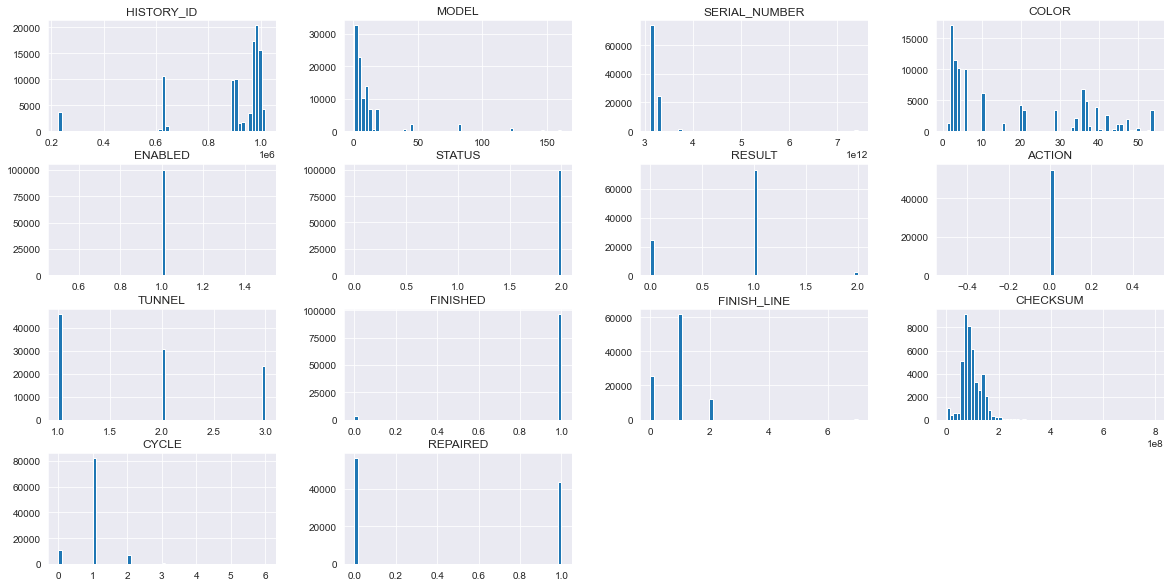

In [41]:
data_subset.hist(bins=60, figsize=(20, 10))

<AxesSubplot:>

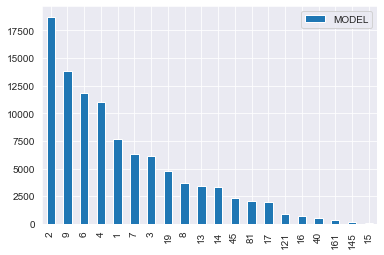

In [44]:
pd.DataFrame(data_subset['MODEL'].value_counts()).plot(kind='bar')

In [50]:
attributes = data[['ENABLED', 'FINISHED',
                   'REPAIRED']]

In [51]:
attributes.apply(pd.Series.value_counts)

,ENABLED,FINISHED,REPAIRED
0,NaN,3334,56382
1,100000.0,96666,43618


In [ ]:
#parse column _time to datetime format
data['DATE_TIME'] = pd.to_datetime(data['DATE_TIME'])

data['Date'] = pd.to_datetime(data['DATE_TIME']).dt.date
data['Time'] = pd.to_datetime(data['DATE_TIME']).dt.time
second_column = data.pop('Date')
data.insert(1, 'Date', second_column)
third_column = data.pop('Time')
data.insert(2, 'Time', third_column)
data.pop('DATE_TIME')
# #bin encoding of column data['Recognized']
# #OK - 1, NOK - 0
# data['Recognized'] = data['Recognized'].map(lambda x: 1 if x=='OK' else 0)
# data.head(10)
# # splitting dataset: 80% training and 20% test
# #features = list(data.columns.values.tolist())
# features = ['Date', 'Time', 'SkidNr', 'Line', 'Camera', 'Quality1', 'Quality2', 'Quality3', 'Quality4', 'Quality_Min']
# X = data.loc[:, features]
# y = data.loc[:, ['Recognized']]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, train_size= 0.8,  random_state=0)
# # IForest model implementation with target class 'Recognized'
# random_state = np.random.RandomState(42)
#
# model = IsolationForest(n_estimators=100, max_samples='auto', contamination=float(0.2), random_state= random_state)
# model.fit(data[['Recognized']])
# print(model.get_params())
# # anomaly score for 'Recognized'
# #Anonalies are assigned a score value of -1
# data['Score'] = model.decision_function(data[['Recognized']])
# data['Anomaly_score'] = model.predict(data[['Recognized']])
# data[data['Anomaly_score'] == -1].head(10)
# #How many anomalies are in the dataset
# anomalies = len(data[data['Anomaly_score'] == -1])
# rows = len(data)
# #errorPercentile = anomalies / rows
# print("Number of anomalies in dataset", anomalies, "out of", rows, "rows.")
# #Preprocessing the dataset - anomaly values only
# dataA = data[data['Anomaly_score'] == -1]
# #How many anomalies per Line
# pd.value_counts(dataA['Line']).sort_index(ascending= True).to_frame()
# #How many anomalies per
# pd.value_counts(dataA['Camera']).sort_index(ascending= True).to_frame()
# #data[['Line', 'Anomaly_score']].value_counts().sort_index(ascending= True).to_frame()
# data.dtypes
# pd.value_counts(data['Recognized']).sort_index(ascending= True).to_frame()
# dataA['Date'] = pd.to_datetime(dataA['Date'], format='%Y-%m-%d')
# dataA[(dataA["Line"]== 1) & (dataA["Camera"]==1) & (dataA["Date"]=="2022-06-09")]
# #& (data["Date"]=="2022-06-27")
# dataA.groupby(['Date', 'Anomaly_score']).size().sort_values(ascending=False).reset_index(name='count')
# points = {"x_ordinates": [3, 5, 4, 3],
#           "y_ordinates": [3, 3, 4, 5]}
# sns.scatterplot(data=points, x="x_ordinates", y="y_ordinates")
# plt.plot([3],[3],'o', ms=260, mec='r', mfc='none')
# plt.xlim(0)
# plt.ylim(0)